# import data

In [1]:
from WindPy import *

#Wind API 使用W账户密码登录
w.start() 

#return True and then can go to next operation.
w.isconnected()

import pandas as pd

22.11.1.52440
Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2021 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


In [2]:
# w.wsi("123046.SZ,300587.SZ,113642.SH,603185.SH,110061.SH,600674.SH,128081.SZ,002203.SZ,113016.SH,601127.SH,128017.SZ,002597.SZ",  "close",  "2022-09-06 09:00:00",  "2022-09-09 16:28:08",  "")

In [3]:
cbond_list = ['123046.SZ','300587.SZ',
# '113642.SH','603185.SH', #转债已退市
'110061.SH','600674.SH',
'128081.SZ','002203.SZ',
'113016.SH','601127.SH',
'128017.SZ','002597.SZ',
'113537.SH','603348.SH',
'123027.SZ','300487.SZ', #转债已退市
'113534.SH','603876.SH',
'113025.SH','601677.SH',
'123031.SZ','300655.SZ',
'128029.SZ','002078.SZ',
'128111.SZ','002738.SZ', #2022-10-14新增4个对子
'128095.SZ','002812.SZ',
'113626.SH','603596.SH',
'123092.SZ','300332.SZ',
'123057.SZ','300586.SZ',#2020-11-18新增3个对子
'123067.SZ','300382.SZ',
'128106.SZ','002840.SZ',
]

# history trade days

In [4]:
# ###############################################################
# before_trade_date = '20220908'#监测当日前一个交易日
# present_date = '20220909' #监测当日
# next_trade_date = '20220910' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220909'#监测当日前一个交易日
# present_date = '20220913' #监测当日
# next_trade_date = '20220914' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220913'#监测当日前一个交易日
# present_date = '20220914' #监测当日
# next_trade_date = '20220915' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220914'#监测当日前一个交易日
# present_date = '20220915' #监测当日
# next_trade_date = '20220916' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220915'#监测当日前一个交易日
# present_date = '20220916' #监测当日
# next_trade_date = '20220917' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220916'#监测当日前一个交易日
# present_date = '20220919' #监测当日
# next_trade_date = '20220920' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220919'#监测当日前一个交易日
# present_date = '20220920' #监测当日
# next_trade_date = '20220921' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220920'#监测当日前一个交易日
# present_date = '20220921' #监测当日
# next_trade_date = '20220922' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220921'#监测当日前一个交易日
# present_date = '20220922' #监测当日
# next_trade_date = '20220923' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220922'#监测当日前一个交易日
# present_date = '20220923' #监测当日
# next_trade_date = '20220924' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220923'#监测当日前一个交易日
# present_date = '20220926' #监测当日
# next_trade_date = '20220927' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220926'#监测当日前一个交易日
# present_date = '20220927' #监测当日
# next_trade_date = '20220928' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220927'#监测当日前一个交易日
# present_date = '20220928' #监测当日
# next_trade_date = '20220929' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220928'#监测当日前一个交易日
# present_date = '20220929' #监测当日
# next_trade_date = '20220930' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220929'#监测当日前一个交易日
# present_date = '20220930' #监测当日
# next_trade_date = '20221001' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220930'#监测当日前一个交易日
# present_date = '20221010' #监测当日
# next_trade_date = '20221011' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221010'#监测当日前一个交易日
# present_date = '20221011' #监测当日
# next_trade_date = '20221012' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221011'#监测当日前一个交易日
# present_date = '20221012' #监测当日
# next_trade_date = '20221013' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221012'#监测当日前一个交易日
# present_date = '20221013' #监测当日
# next_trade_date = '20221014' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221013'#监测当日前一个交易日
# present_date = '20221014' #监测当日
# next_trade_date = '20221015' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221014'#监测当日前一个交易日
# present_date = '20221017' #监测当日
# next_trade_date = '20221018' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221017'#监测当日前一个交易日
# present_date = '20221018' #监测当日
# next_trade_date = '20221019' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221018'#监测当日前一个交易日
# present_date = '20221019' #监测当日
# next_trade_date = '20221020' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221019'#监测当日前一个交易日
# present_date = '20221020' #监测当日
# next_trade_date = '20221021' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221020'#监测当日前一个交易日
# present_date = '20221021' #监测当日
# next_trade_date = '20221022' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221021'#监测当日前一个交易日
# present_date = '20221024' #监测当日
# next_trade_date = '20221025' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221024'#监测当日前一个交易日
# present_date = '20221025' #监测当日
# next_trade_date = '20221026' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221025'#监测当日前一个交易日
# present_date = '20221026' #监测当日
# next_trade_date = '20221027' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221026'#监测当日前一个交易日
# present_date = '20221027' #监测当日
# next_trade_date = '20221028' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221027'#监测当日前一个交易日
# present_date = '20221028' #监测当日
# next_trade_date = '20221029' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221028'#监测当日前一个交易日
# present_date = '20221031' #监测当日
# next_trade_date = '20221101' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221031'#监测当日前一个交易日
# present_date = '20221101' #监测当日
# next_trade_date = '20221102' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221101'#监测当日前一个交易日
# present_date = '20221102' #监测当日
# next_trade_date = '20221103' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221102'#监测当日前一个交易日
# present_date = '20221103' #监测当日
# next_trade_date = '20221104' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221103'#监测当日前一个交易日
# present_date = '20221104' #监测当日
# next_trade_date = '20221105' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221104'#监测当日前一个交易日
# present_date = '20221107' #监测当日
# next_trade_date = '20221108' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221107'#监测当日前一个交易日
# present_date = '20221108' #监测当日
# next_trade_date = '20221109' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221108'#监测当日前一个交易日
# present_date = '20221109' #监测当日
# next_trade_date = '20221110' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221109'#监测当日前一个交易日
# present_date = '20221110' #监测当日
# next_trade_date = '20221111' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221110'#监测当日前一个交易日
# present_date = '20221111' #监测当日
# next_trade_date = '20221112' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221111'#监测当日前一个交易日
# present_date = '20221114' #监测当日
# next_trade_date = '20221115' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221114'#监测当日前一个交易日
# present_date = '20221115' #监测当日
# next_trade_date = '20221116' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221115'#监测当日前一个交易日
# present_date = '20221116' #监测当日
# next_trade_date = '20221117' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221116'#监测当日前一个交易日
# present_date = '20221117' #监测当日
# next_trade_date = '20221118' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221117'#监测当日前一个交易日
# present_date = '20221118' #监测当日
# next_trade_date = '20221119' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221118'#监测当日前一个交易日
# present_date = '20221121' #监测当日
# next_trade_date = '20221122' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221121'#监测当日前一个交易日
# present_date = '20221122' #监测当日
# next_trade_date = '20221123' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221122'#监测当日前一个交易日
# present_date = '20221123' #监测当日
# next_trade_date = '20221124' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221123'#监测当日前一个交易日
# present_date = '20221124' #监测当日
# next_trade_date = '20221125' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221124'#监测当日前一个交易日
# present_date = '20221125' #监测当日
# next_trade_date = '20221126' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221125'#监测当日前一个交易日
# present_date = '20221128' #监测当日
# next_trade_date = '20221129' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221128'#监测当日前一个交易日
# present_date = '20221129' #监测当日
# next_trade_date = '20221130' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221129'#监测当日前一个交易日
# present_date = '20221130' #监测当日
# next_trade_date = '20221201' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221130'#监测当日前一个交易日
# present_date = '20221201' #监测当日
# next_trade_date = '20221202' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221201'#监测当日前一个交易日
# present_date = '20221202' #监测当日
# next_trade_date = '20221203' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221202'#监测当日前一个交易日
# present_date = '20221205' #监测当日
# next_trade_date = '20221206' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221205'#监测当日前一个交易日
# present_date = '20221206' #监测当日
# next_trade_date = '20221207' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221206'#监测当日前一个交易日
# present_date = '20221207' #监测当日
# next_trade_date = '20221208' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221207'#监测当日前一个交易日
# present_date = '20221208' #监测当日
# next_trade_date = '20221209' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221208'#监测当日前一个交易日
# present_date = '20221209' #监测当日
# next_trade_date = '20221210' #监测当日下一个自然日
# ###############################################################


In [5]:

# ###############################################################
# before_trade_date = '20221209'#监测当日前一个交易日
# present_date = '20221212' #监测当日
# next_trade_date = '20221213' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221212'#监测当日前一个交易日
# present_date = '20221213' #监测当日
# next_trade_date = '20221214' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221213'#监测当日前一个交易日
# present_date = '20221214' #监测当日
# next_trade_date = '20221215' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221214'#监测当日前一个交易日
# present_date = '20221215' #监测当日
# next_trade_date = '20221216' #监测当日下一个自然日
# ###############################################################

# ###############################################################
before_trade_date = '20221215'#监测当日前一个交易日
present_date = '20221216' #监测当日
next_trade_date = '20221217' #监测当日下一个自然日
# ###############################################################

In [6]:
start_date = pd.to_datetime(before_trade_date) 
end_date = pd.to_datetime(next_trade_date)

cbond_price = pd.DataFrame([])
for code in cbond_list:
    price_df = w.wsi(code, "close", start_date, end_date,usedf=True)[1]   #只要了收盘价
    price_df.columns = [code]
    cbond_price = pd.concat([cbond_price,price_df],axis=1)
cbond_price = cbond_price.ffill()    
# cbond_rtn = cbond_price[cbond_price.index.time!=time(15,0,0)]
# cbond_price = cbond_price.loc['2022-09-09 15:00:00':] #从前一个交易日的收盘价开始截取
cbond_price_begin_time = before_trade_date[:4]+'-' + \
                    before_trade_date[4:6]+'-' + \
                    before_trade_date[6:8]+' 15:00:00'
cbond_price = cbond_price.loc[cbond_price_begin_time:]
cbond_price

,123046.SZ,300587.SZ,110061.SH,600674.SH,128081.SZ,002203.SZ,113016.SH,601127.SH,128017.SZ,002597.SZ,...,113626.SH,603596.SH,123092.SZ,300332.SZ,123057.SZ,300586.SZ,123067.SZ,300382.SZ,128106.SZ,002840.SZ
2022-12-15 15:00:00,364.501,12.65,134.751,11.53,126.450,11.87,353.771,47.31,188.797,35.30,...,234.445,82.40,249.850,12.11,227.400,19.81,208.098,19.68,205.001,17.62
2022-12-16 09:30:00,364.751,12.60,134.891,11.52,126.465,11.91,351.047,46.58,188.580,35.23,...,234.420,81.20,252.000,12.13,225.710,19.53,207.738,19.55,203.593,17.24
2022-12-16 09:31:00,364.108,12.60,134.799,11.52,125.904,11.85,351.515,46.69,188.650,35.23,...,234.288,81.30,251.538,12.10,225.805,19.52,207.252,19.49,203.329,17.25
2022-12-16 09:32:00,363.447,12.55,134.968,11.54,125.728,11.86,350.260,46.36,188.502,35.17,...,232.395,80.92,251.449,12.04,224.100,19.43,206.988,19.45,202.829,17.25
2022-12-16 09:33:00,362.542,12.51,134.721,11.54,125.942,11.85,349.519,46.35,188.640,35.16,...,232.600,80.80,249.907,12.03,224.839,19.56,206.818,19.42,203.325,17.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-16 14:56:00,356.967,12.59,135.337,11.61,124.803,11.76,341.385,44.76,179.660,34.62,...,223.810,77.98,243.333,12.07,206.572,18.68,200.800,19.14,197.220,16.91
2022-12-16 14:57:00,356.988,12.59,135.556,11.61,124.873,11.76,341.857,44.80,179.432,34.62,...,224.488,77.98,243.333,12.07,206.560,18.68,200.776,19.06,197.220,16.91
2022-12-16 14:58:00,356.988,12.59,135.675,11.61,124.873,11.76,341.870,44.80,179.432,34.62,...,223.731,77.98,243.333,12.07,206.560,18.68,200.776,19.06,197.220,16.91
2022-12-16 14:59:00,356.988,12.59,135.700,11.61,124.873,11.76,342.300,44.80,179.432,34.62,...,223.794,77.98,243.333,12.07,206.560,18.68,200.776,19.06,197.220,16.91


In [7]:
start_date = pd.to_datetime(before_trade_date) 
end_date = pd.to_datetime(next_trade_date)

cbond_volume = pd.DataFrame([])
for code in cbond_list:
    volume_df = w.wsi(code, "volume", start_date, end_date,usedf=True)[1]   #只要了收盘价
    volume_df.columns = [code]
    cbond_volume = pd.concat([cbond_volume,volume_df],axis=1)
cbond_volume = cbond_volume.ffill()    
# cbond_rtn = cbond_price[cbond_price.index.time!=time(15,0,0)]
# cbond_price = cbond_price.loc['2022-09-09 15:00:00':] #从前一个交易日的收盘价开始截取
cbond_price_begin_time = before_trade_date[:4]+'-' + \
                    before_trade_date[4:6]+'-' + \
                    before_trade_date[6:8]+' 15:00:00'
cbond_volume = cbond_volume.loc[cbond_price_begin_time:]
cbond_volume

,123046.SZ,300587.SZ,110061.SH,600674.SH,128081.SZ,002203.SZ,113016.SH,601127.SH,128017.SZ,002597.SZ,...,113626.SH,603596.SH,123092.SZ,300332.SZ,123057.SZ,300586.SZ,123067.SZ,300382.SZ,128106.SZ,002840.SZ
2022-12-15 15:00:00,2230.0,164700.0,0.0,50000.0,1180.0,81700.0,9.0,202953.0,620.0,45760.0,...,20.0,45500.0,4010.0,106800.0,9380.0,226700.0,5600.0,119800.0,18410.0,266979.0
2022-12-16 09:30:00,4610.0,114100.0,780.0,94800.0,6210.0,38100.0,3713.0,619100.0,4100.0,92400.0,...,4345.0,202800.0,18670.0,135900.0,18650.0,230500.0,11320.0,43243.0,63580.0,894900.0
2022-12-16 09:31:00,2380.0,89700.0,1776.0,36300.0,2690.0,17300.0,1935.0,172600.0,2320.0,29700.0,...,3076.0,120400.0,4760.0,15800.0,22770.0,153900.0,8240.0,47100.0,48760.0,370600.0
2022-12-16 09:32:00,3430.0,169400.0,929.0,40600.0,7770.0,8600.0,2718.0,291800.0,1030.0,11100.0,...,1855.0,64200.0,4840.0,23800.0,23720.0,263500.0,9410.0,68900.0,22820.0,314700.0
2022-12-16 09:33:00,1930.0,136200.0,535.0,18300.0,6880.0,6900.0,2776.0,267800.0,1090.0,34500.0,...,1858.0,51900.0,7350.0,29700.0,20590.0,91700.0,5530.0,21500.0,23660.0,192900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-16 14:56:00,1330.0,110676.0,113.0,51882.0,3690.0,71500.0,1094.0,165100.0,1290.0,27032.0,...,475.0,19000.0,1300.0,29300.0,8510.0,98630.0,2880.0,59900.0,9360.0,178500.0
2022-12-16 14:57:00,190.0,0.0,12.0,0.0,10.0,13900.0,459.0,200.0,10.0,0.0,...,454.0,0.0,0.0,100.0,860.0,2400.0,130.0,700.0,150.0,4300.0
2022-12-16 14:58:00,0.0,0.0,137.0,0.0,0.0,0.0,424.0,0.0,0.0,0.0,...,311.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-12-16 14:59:00,0.0,0.0,292.0,0.0,0.0,0.0,974.0,0.0,0.0,0.0,...,390.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# assert False

# stock pre status

In [9]:
df_stk_pre_return = w.wss("300587.SZ,603185.SH,600674.SH,002203.SZ,601127.SH,002597.SZ,603348.SH,300487.SZ,603876.SH,601677.SH,300655.SZ,002078.SZ,002738.SZ,002812.SZ,603596.SH,300332.SZ,300586.SZ,300382.SZ,002840.SZ",
 "pct_chg", f"tradeDate={before_trade_date};cycle=D;",usedf=True)[1]
df_stk_pre_return = w.wss("300587.SZ,600674.SH,002203.SZ,601127.SH,002597.SZ,603348.SH,300487.SZ,603876.SH,601677.SH,300655.SZ,002078.SZ,002738.SZ,002812.SZ,603596.SH,300332.SZ,300586.SZ,300382.SZ,002840.SZ",
"pct_chg", f"tradeDate={before_trade_date};cycle=D;",usedf=True)[1]
df_stk_pre_return
df_stk_pre_return

,PCT_CHG
300587.SZ,2.098467
600674.SH,-0.345722
002203.SZ,0.000000
601127.SH,3.932337
002597.SZ,-1.120448
603348.SH,3.966102
300487.SZ,0.801068
603876.SH,1.275286
601677.SH,-1.912145
300655.SZ,1.827347


In [10]:
df_bond_pre_return = w.wss("123046.SZ,113642.SH,110061.SH,128081.SZ,113016.SH,128017.SZ,113537.SH,123027.SZ,113534.SH,113025.SH,123031.SZ,128029.SZ,128111.SZ,128095.SZ,113626.SH,123092.SZ,123057.SZ,123067.SZ,128106.SZ",
 "pct_chg", f"tradeDate={before_trade_date};cycle=D;",usedf=True)[1]
df_bond_pre_return

,PCT_CHG
123046.SZ,0.913898
113642.SH,NaN
110061.SH,-0.119337
128081.SZ,-0.118483
113016.SH,2.102538
128017.SZ,-2.091480
113537.SH,1.392095
123027.SZ,NaN
113534.SH,0.696970
113025.SH,-2.238069


In [11]:
before_trade_date_trade_status = before_trade_date[:4] +'-'+ before_trade_date[4:6] +'-'+ before_trade_date[6:]
# present_date_trade_status = present_date[:4] +'-'+ present_date[4:6] +'-'+ present_date[6:]
df_stk_pre_trade_status = w.wsd("300587.SZ,603185.SH,600674.SH,002203.SZ,601127.SH,002597.SZ,603348.SH,300487.SZ,603876.SH,601677.SH,300655.SZ,002078.SZ,002738.SZ,002812.SZ,603596.SH,300332.SZ,300586.SZ,300382.SZ,002840.SZ", 
"trade_status", f"{before_trade_date_trade_status}", f"{before_trade_date_trade_status}", "",usedf=True)[1]
df_stk_pre_trade_status

,TRADE_STATUS
300587.SZ,交易
603185.SH,交易
600674.SH,交易
002203.SZ,交易
601127.SH,交易
002597.SZ,交易
603348.SH,交易
300487.SZ,交易
603876.SH,交易
601677.SH,交易


In [12]:
df_stk_pre_trade_status.iloc[0,0]

'交易'

In [13]:
# assert False

# bond-stock pair

In [14]:
# cbond_pair = ['113642.SH','603185.SH']  #后面筛选的结果，这组也在里面 转债停止交易了
# open_threshold = 0.023
# close_threshold = 0
# convert_price = 102.4
# operate = True

# cbond_pair = ['123027.SZ','300487.SZ',] # 1019 1020 1021 这几天转债停止交易了
# open_threshold = 0.022
# close_threshold = 0
# convert_price = 19.07
# operate = True

In [351]:
cbond_pair = ['123046.SZ','300587.SZ'] #这个被操纵了，每日总结的时候剔除掉
open_threshold = 0.015
close_threshold = 0
convert_price = 3.94
operate = True

cbond_pair = ['110061.SH','600674.SH']
open_threshold = 0.006
close_threshold = 0
convert_price = 8.8
operate = True

cbond_pair = ['128081.SZ','002203.SZ']
open_threshold = 0.012
close_threshold = 0.002
convert_price = 9.62
operate = True

cbond_pair = ['113016.SH','601127.SH'] #这个被操纵了，每日总结的时候剔除掉
open_threshold = 0.017
close_threshold = 0.003
convert_price = 20.17
operate = True

cbond_pair = ['128017.SZ','002597.SZ']
open_threshold = 0.012
close_threshold = 0
convert_price = 21.33
operate = True

# # # # # # # $$$$$$$$$$$$$$$$$$$$$$$$以下是新增的对子$$$$$$$$$$$$$$$$$$$$$$$$
cbond_pair = ['113537.SH','603348.SH',]
open_threshold = 0.027
close_threshold = 0.002
convert_price = 19.13
operate = True

cbond_pair = ['113534.SH','603876.SH',]
open_threshold = 0.019
close_threshold = 0.002
convert_price = 14.98
operate = True

cbond_pair = ['113025.SH','601677.SH',]
open_threshold = 0.018
close_threshold = 0
convert_price = 7.66
operate = True

cbond_pair = ['123031.SZ','300655.SZ',]   #这个被操纵了，每日总结的时候剔除掉
open_threshold = 0.019
close_threshold = 0
convert_price = 6.25
operate = True

cbond_pair = ['128029.SZ','002078.SZ']
open_threshold = 0.013
close_threshold = 0.002
convert_price = 8.25
operate = True

# # # # # # # $$$$$$$$$$$$$$$$$$$$$$$$【2022-10-14】新增的对子$$$$$$$$$$$$$$$$$$$$$$$$
cbond_pair = ['128111.SZ','002738.SZ'] #这个被操纵了，每日总结的时候剔除掉
open_threshold = 0.011
close_threshold = 0.001
convert_price = 10.96
operate = True

cbond_pair = ['128095.SZ','002812.SZ']
open_threshold = 0.013
close_threshold = 0
convert_price = 64.62
operate = True

cbond_pair = ['113626.SH','603596.SH']
open_threshold = 0.02
close_threshold = 0
convert_price = 35.88
operate = True

cbond_pair = ['123092.SZ','300332.SZ']
open_threshold = 0.025
close_threshold = 0.001
convert_price = 5.14
operate = True

# # # # # # # $$$$$$$$$$$$$$$$$$$$$$$$【2022-11-18】新增的对子$$$$$$$$$$$$$$$$$$$$$$$$
cbond_pair =  ['123057.SZ','300586.SZ'] #这个对子的spread较小，不用diff超过2倍spread强制平仓的止损逻辑
open_threshold = 0.009 
close_threshold = 0.003
convert_price = 9.5
operate = True

cbond_pair =  ['123067.SZ','300382.SZ'] #这个对子的spread较小，不用diff超过2倍spread强制平仓的止损逻辑
open_threshold = 0.004
close_threshold = 0.002
convert_price = 9.96
operate = True

cbond_pair =  ['128106.SZ','002840.SZ']
open_threshold = 0.01
close_threshold = 0
convert_price = 8.85
operate = True


In [352]:
# df_signal

# clip price series

In [353]:
#从前一个交易日的收盘价开始截取
# cbond_pair_price = cbond_price[[cbond_pair[0],cbond_pair[1]]].loc['2022-09-08 15:00:00':]
cbond_pair_price = cbond_price[[cbond_pair[0],cbond_pair[1]]]

In [354]:
cbond_pair_price.head()

,128106.SZ,002840.SZ
2022-12-15 15:00:00,205.001,17.62
2022-12-16 09:30:00,203.593,17.24
2022-12-16 09:31:00,203.329,17.25
2022-12-16 09:32:00,202.829,17.25
2022-12-16 09:33:00,203.325,17.26


In [355]:
cbond_return = pd.DataFrame([])

cbond_preclose = cbond_pair_price.iloc[0,0] # 初始时刻的bond前收盘价
stock_preclose = cbond_pair_price.iloc[0,1] # 初始时刻的stock前收盘价

for index,row in cbond_pair_price.iterrows():
    
    cbond_return.loc[index,cbond_pair[0]] = row[cbond_pair[0]]/cbond_preclose - 1 # 算日内的return
    cbond_return.loc[index,cbond_pair[1]] = row[cbond_pair[1]]/stock_preclose - 1

    if index.time()==time(15,0,0):  #算完日内return，迭代到今日价格的最后一个time bar的时候，将其设为前收盘价
        cbond_preclose = row[cbond_pair[0]]    # 日内return指标用 现价/昨日收盘价 计算
        stock_preclose = row[cbond_pair[1]]
        
# 检查df是否有空值
cbond_return.isnull().sum(axis=0)  # 按列统计
cbond_return.isnull().sum(axis=1) # 按行统计
cbond_return.isnull().sum(axis=1).sum() # 统计整张表

0

In [356]:
# pd.set_option('display.max_rows', None)
cbond_return['diff'] = cbond_return[cbond_pair[0]] - cbond_return[cbond_pair[1]]
print(len(cbond_return))
cbond_return.head()

243


,128106.SZ,002840.SZ,diff
2022-12-15 15:00:00,0.000000,0.000000,0.000000
2022-12-16 09:30:00,-0.006868,-0.021566,0.014698
2022-12-16 09:31:00,-0.008156,-0.020999,0.012843
2022-12-16 09:32:00,-0.010595,-0.020999,0.010404
2022-12-16 09:33:00,-0.008176,-0.020431,0.012256


# signal calculate

In [357]:
################################################################################################
stk_pre_return = df_stk_pre_return.loc[cbond_pair[1]].values[0]
bond_pre_return = df_bond_pre_return.loc[cbond_pair[0]].values[0]
pre_diff = bond_pre_return - stk_pre_return
stk_pre_trade_status = df_stk_pre_trade_status.loc[cbond_pair[1]].values[0]
print(stk_pre_trade_status)
print('pre diff:',pre_diff)
# if abs(stk_pre_return) > 10 or stk_pre_trade_status!='交易':
if abs(pre_diff) > 5 or stk_pre_trade_status!='交易':
    # 如果前一天股票的跌幅小于-10，则今日不做操作
    intraday_open_times = 1
else:
    intraday_open_times = 0
################################################################################################    
open_close_spread = open_threshold - close_threshold
# intraday_open_times = 0
max_open = 1

pos_open_flag = 0
neg_open_flag = 0
cbond_position = pd.DataFrame([])
cbond_position.index = cbond_return.index
for index,row in cbond_return.iterrows():

    if row['diff'] >= open_threshold and pos_open_flag==0 and neg_open_flag==0:
        if intraday_open_times < max_open:
            #diff落在A区间，且无仓位，正开
            pos_open_flag = 1
            neg_open_flag = 0
            cbond_position.loc[index,cbond_pair[0]] = -1*pos_open_flag
            cbond_position.loc[index,cbond_pair[1]] = pos_open_flag
            intraday_open_times += 1
        else:
            pos_open_flag = 0
            neg_open_flag = 0
            cbond_position.loc[index,cbond_pair[0]] = -1*pos_open_flag
            cbond_position.loc[index,cbond_pair[1]] = pos_open_flag
    elif row['diff'] >= open_threshold and pos_open_flag==0 and neg_open_flag==1:
        if intraday_open_times < max_open:
            #diff落在A区间，且有负仓，平仓再正开
            pos_open_flag=1
            neg_open_flag=0
            cbond_position.loc[index,cbond_pair[0]] = -1*pos_open_flag
            cbond_position.loc[index,cbond_pair[1]] = pos_open_flag
            print('reverse open +1')
            intraday_open_times += 1
        else:
            pos_open_flag = 0
            neg_open_flag = 0
            cbond_position.loc[index,cbond_pair[0]] = -1*pos_open_flag
            cbond_position.loc[index,cbond_pair[1]] = pos_open_flag
    elif row['diff'] >= open_threshold and pos_open_flag==1 and neg_open_flag==0:
        #diff落在A区间，且有正仓，keep
        pos_open_flag=1
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = -1*pos_open_flag
        cbond_position.loc[index,cbond_pair[1]] = pos_open_flag

    if row['diff'] > close_threshold and row['diff'] < open_threshold and pos_open_flag==1 and neg_open_flag==0:
        #diff 落在B区间，且有正仓，keep
        pos_open_flag=1
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = -1*pos_open_flag
        cbond_position.loc[index,cbond_pair[1]] = pos_open_flag
    elif row['diff'] > close_threshold and row['diff'] < open_threshold and pos_open_flag==0 and neg_open_flag==1:
        #diff 落在B区间，且有负仓，平仓
        pos_open_flag=0
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
        cbond_position.loc[index,cbond_pair[1]] = neg_open_flag
    elif row['diff'] > close_threshold and row['diff'] < open_threshold and pos_open_flag==0 and neg_open_flag==0:
        #diff 落在B区间，且无仓，keep
        pos_open_flag=0
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
        cbond_position.loc[index,cbond_pair[1]] = neg_open_flag
    
    if row['diff'] >= -1*close_threshold and row['diff'] <= close_threshold and pos_open_flag==1 and neg_open_flag==0:
        #diff 落在C区间，且有正仓，平仓
        pos_open_flag=0
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = pos_open_flag
        cbond_position.loc[index,cbond_pair[1]] = pos_open_flag
    elif row['diff'] >= -1*close_threshold and row['diff'] <= close_threshold and pos_open_flag==0 and neg_open_flag==1:
        #diff 落在C区间，且有负仓，平仓
        pos_open_flag=0
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
        cbond_position.loc[index,cbond_pair[1]] = neg_open_flag
    elif row['diff'] >= -1*close_threshold and row['diff'] <= close_threshold and pos_open_flag==0 and neg_open_flag==0:
        #diff 落在C区间，且无仓位，keep
        pos_open_flag=0
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
        cbond_position.loc[index,cbond_pair[1]] = neg_open_flag
    
    if row['diff'] > -1*open_threshold and row['diff'] < -1*close_threshold and pos_open_flag==0 and neg_open_flag==1:
        #diff 落在D区间，且有负仓，keep
        pos_open_flag=0
        neg_open_flag=1
        cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
        cbond_position.loc[index,cbond_pair[1]] = -1*neg_open_flag

    elif row['diff'] > -1*open_threshold and row['diff'] < -1*close_threshold and pos_open_flag==1 and neg_open_flag==0:
        #diff 落在D区间，且有正仓，平仓
        pos_open_flag=0
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = pos_open_flag
        cbond_position.loc[index,cbond_pair[1]] = pos_open_flag
    elif row['diff'] > -1*open_threshold and row['diff'] < -1*close_threshold and pos_open_flag==0 and neg_open_flag==0:
        #diff 落在D区间，且无仓位，keep
        pos_open_flag=0
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = pos_open_flag
        cbond_position.loc[index,cbond_pair[1]] = pos_open_flag

    if row['diff'] <= -1*open_threshold and pos_open_flag==0 and neg_open_flag==0:
        if intraday_open_times < max_open:
            #diff 落在E区间，且无仓位，反开
            pos_open_flag=0
            neg_open_flag=1
            cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
            cbond_position.loc[index,cbond_pair[1]] = -1*neg_open_flag
            intraday_open_times += 1
        else:
            pos_open_flag=0
            neg_open_flag=0
            cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
            cbond_position.loc[index,cbond_pair[1]] = -1*neg_open_flag
    elif row['diff'] <= -1*open_threshold and pos_open_flag==1 and neg_open_flag==0:
        if intraday_open_times < max_open:
            #diff 落在E区间，且有正仓，平仓反开
            pos_open_flag=0
            neg_open_flag=1
            cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
            cbond_position.loc[index,cbond_pair[1]] = -1*neg_open_flag
            intraday_open_times += 1
        else:
            pos_open_flag=0
            neg_open_flag=0
            cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
            cbond_position.loc[index,cbond_pair[1]] = -1*neg_open_flag
    elif row['diff'] <= -1*open_threshold and pos_open_flag==0 and neg_open_flag==1:
        #diff 落在E区间，且有负仓，keep
        pos_open_flag=0
        neg_open_flag=1
        cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
        cbond_position.loc[index,cbond_pair[1]] = -1*neg_open_flag

    if abs(row['diff'])>2 * open_close_spread and cbond_return.columns[0]!='123057.SZ' and cbond_return.columns[0]!='123067.SZ': 
        #盘中diff超过2倍spread时平仓（价格止损信号）,有两个spread特别小的对子则不用此逻辑进行止损
        pos_open_flag=0
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = pos_open_flag
        cbond_position.loc[index,cbond_pair[1]] = pos_open_flag

    if index.time()==time(15,0,0): # 每日收盘时必须平仓（时间止损信号）
    # if index.time()==time(14,59,0): # 每日收盘时必须平仓（时间止损信号）
        intraday_open_times = 0 # 下一天开盘前，把当日记录下来的开仓次数清零
        pos_open_flag=0
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = pos_open_flag
        cbond_position.loc[index,cbond_pair[1]] = pos_open_flag

交易
pre diff: -0.9760792127645443


In [358]:
cbond_pair_price.head()

,128106.SZ,002840.SZ
2022-12-15 15:00:00,205.001,17.62
2022-12-16 09:30:00,203.593,17.24
2022-12-16 09:31:00,203.329,17.25
2022-12-16 09:32:00,202.829,17.25
2022-12-16 09:33:00,203.325,17.26


In [359]:
df_signal = pd.concat([cbond_pair_price,cbond_return,cbond_position],axis=1)
df_signal.columns = ['bond_price','stock_price','bond_rtn','stock_rtn','diff','bond_pos','stock_pos']
print('open threshold',open_threshold,'close threshold',close_threshold)
# df_signal.to_csv('tmp_signal.csv')
# df_signal

open threshold 0.01 close threshold 0


In [360]:
# assert False

# backtest

In [361]:
# 用来记录交易流水的表格,一边遍历df_signal，一边填入内容到流水表格里

import numpy as np
cols = ['balance','signal','bond price','stock price','bond hold','stock hold','commission','tax','reverse open','diff','asset value']
df_trade = pd.DataFrame(
    data = [[0,np.nan,np.nan,np.nan,0,0,0,0,np.nan,np.nan,0]],
    columns=cols
    ) 

balance_last = 0 # 现金账户初始余额

bond_hold = 0 # 债券持有数量
stock_hold = 0 # 股票持有数量


commission_rate = 2/10000 + 0 # 佣金买卖万二 + 交易滑点
# commission_rate = 2/10000 + 0.5/1000 # 佣金买卖万二 + 交易滑点
# commission_rate = 2/10000 + 1/1000 # 佣金买卖万二 + 交易滑点

tax_rate = 1/1000 # 卖股票才收印花税千一

# commission_rate = 0/10000 # 佣金买卖万二
# tax_rate = 0/1000 #

for i in range(len(df_signal)-1):
    if df_signal.index[i].time() == time(15,0,0):
    # if df_signal.index[i].time() == time(14,59,0):
        # 修改stock volume 每天固定一个stock volume 应该用债的前收盘价/股票的前收盘价
        stock_volume = df_signal['bond_price'][i]/df_signal['stock_price'][i]

    if df_signal.values[i][-1] != df_signal.values[i+1][-1]:

        index = df_signal.index[i+1]        
        diff = df_signal.values[i+1][-3] #diff在df_signal中的倒数第三列
        
    # df_signal的columns
    # ['bond_price','stock_price','bond_rtn','stock_rtn','diff','bond_pos','stock_pos']
        signal = str(int(df_signal.values[i+1][-2]))+str(int(df_signal.values[i+1][-1]))
        
        bond_price = df_signal.values[i+1][0] 

        stock_price = df_signal.values[i+1][1]

        ########################################################################
        # 增加回测中，当前分钟成交量的限制
        bond_minute_volume = cbond_volume[cbond_pair[0]].values[i+1]
        stk_minute_volume = cbond_volume[cbond_pair[1]].values[i+1]
        print(index,bond_minute_volume,stk_minute_volume)
        # assert False
        ########################################################################

        ########################################################################
        # 增加回测中买卖价差限制，买入价按照现价加0.01卖出价按照现价减0.01，模拟真实交易环境中滑点问题
        slippage = 0
        if signal == '1-1':
            bond_price += slippage
            stock_price -= slippage
        elif signal == '-11':
            bond_price -= slippage
            stock_price += slippage
        elif signal=='00':
            if stock_hold == stock_volume:
                bond_price += slippage
                stock_price -= slippage
            else:
                bond_price -= slippage
                stock_price += slippage
        ########################################################################
        # stock_volume =  bond_price/stock_price # 修改stock volume 每天固定一个stock volume应该用债的前收盘价/股票的前收盘价

        commission = (bond_price + stock_price * stock_volume) * commission_rate

        reverse_open = False #表明这笔交易，是否包含平仓后再反向开仓的操作

        if signal == '00' and stock_hold == stock_volume: #有股票持仓并且需要卖出平仓时，有印花税
            tax = stock_price * tax_rate * stock_volume
        else:
            tax = 0

        if signal == '00':
            balance_last += bond_hold*bond_price
            balance_last += stock_hold*stock_price
            
            bond_hold = 0
            stock_hold = 0
            

        if signal == '1-1':
            '''
            加一个检测之前持仓的模块,如果之前因为-11的信号有持仓,需要先平掉(即买债卖股票),同时再反向开仓
            '''
            reverse_flag = False
            if bond_hold == -1 and stock_hold == 1*stock_volume:
                bond_hold = 0
                stock_hold = 0
                balance_last -= bond_price 
                balance_last += stock_price * stock_volume
                commission *= 2 # 因为平掉之后再反向开仓，手续费double
                tax = stock_price * tax_rate * stock_volume # 卖股票要收印花税
                reverse_flag = True
                reverse_open = True

            bond_hold += 1
            stock_hold += (-1 * stock_volume)
            # stock_hold += stock_volume
            balance_last -= bond_price
            balance_last += stock_price * stock_volume
            
            if reverse_flag:
                tax *= 2 #平仓然后反向开仓的时候 已经计算过tax了，直接double
            else:
                tax = stock_price * tax_rate * stock_volume # 卖股票要收印花税

        if signal == '-11':
            '''
            加一个检测之前持仓的模块,如果之前因为1-1的信号有持仓,需要先平掉(卖债买股票),同时再反向开仓
            '''
            if bond_hold == 1 and stock_hold == -1*stock_volume:
                bond_hold = 0
                stock_hold = 0
                balance_last += bond_price
                balance_last -= stock_price * stock_volume
                commission *= 2 # 因为平掉之后再反向开仓，手续费double
                                # 买股票无印花税
                reverse_open = True
            bond_hold += -1
            stock_hold += (1 * stock_volume)
            # stock_hold += stock_volume
            balance_last += bond_price
            balance_last -= stock_price * stock_volume
        
        balance_last = balance_last - commission - tax
        balance = balance_last
        asset_value = bond_price*bond_hold + stock_price*stock_hold
        line = [balance,signal,bond_price,stock_price,bond_hold,stock_hold,commission,tax,reverse_open,diff,asset_value]
        # df_trade.loc[index,['balance','asset','signal','bond price','stock price','commission','tax']] = line
        # df_trade.loc[index,cols] = [0,0,np.nan,np.nan,np.nan,0,0,0,0]
        df_trade.loc[index,cols] = line

df_trade.rename(columns={'balance':'cash'},inplace=True)       
df_trade['net value'] = df_trade['cash'] + df_trade['asset value']

2022-12-16 09:30:00 63580.0 894900.0
2022-12-16 14:12:00 3220.0 34900.0


In [362]:
df_trade['operate'] = [operate]*len(df_trade)

In [363]:
df_trade

,cash,signal,bond price,stock price,bond hold,stock hold,commission,tax,reverse open,diff,asset value,net value,operate
0,0.000000,NaN,NaN,NaN,0.0,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,True
2022-12-16 09:30:00,2.932299,-11,203.593,17.24,-1.0,11.634563,0.080835,0.000000,False,0.014698,-3.013134,-0.080835,True
2022-12-16 14:12:00,2.959556,00,195.276,16.81,0.0,0.000000,0.078171,0.195577,False,-0.001468,0.000000,2.959556,True


# output to csv

In [364]:
excel_file_name = './daily_track/'+ present_date+'/' + cbond_pair[0] + '@' + cbond_pair[1] + '.csv'

excel_file_name

df_to_excel = df_trade
df_to_excel['open/close'] = [str(open_threshold)+','+str(close_threshold)]*len(df_to_excel)
df_to_excel['pair'] = [cbond_pair[0] + '@' + cbond_pair[1]]*len(df_to_excel)
df_to_excel = df_to_excel[['pair','cash', 'signal', 'bond price', 'stock price', 'bond hold',
                                            'stock hold', 'commission', 'tax', 'reverse open', 'diff',
                                            'asset value', 'net value', 'open/close','operate']]
df_to_excel.to_csv(excel_file_name,)

In [365]:
present_date

'20221216'

# conclusion

In [372]:
import os
single_trade_files = os.listdir('./daily_track'+'/'+present_date)

df_trade_conclusion = pd.DataFrame([])
for file in single_trade_files:
    if file == 'diff':
        continue
    if file == '.DS_Store' or file.split('.')[1] == 'xlsx':
        continue
    tmp_path = './daily_track'+'/'+present_date+'/'+file
    df_tmp = pd.read_csv(tmp_path,index_col=0)
    tmp_col = list(df_tmp.columns)
    df_tmp_head = pd.DataFrame(data=[tmp_col],columns=tmp_col)
    df_trade_conclusion = df_trade_conclusion.append(df_tmp_head)
    df_trade_conclusion = df_trade_conclusion.append(df_tmp)
df_trade_conclusion.columns
df_trade_conclusion = df_trade_conclusion[['pair','cash', 'signal', 'bond price', 'stock price', 'bond hold',
                                            'stock hold', 'commission', 'tax', 'reverse open', 'diff',
                                            'asset value', 'net value', 'open/close','operate']]
df_trade_conclusion
tmp_path = './daily_track'+'/'+present_date+'/'+f'{present_date}_conclusion.csv'

df_trade_conclusion.to_csv(tmp_path)                                            

# intraday signal

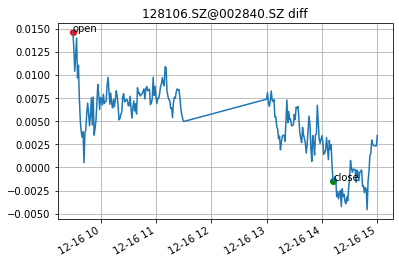

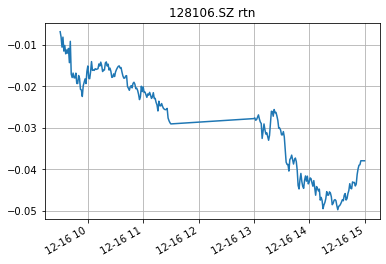

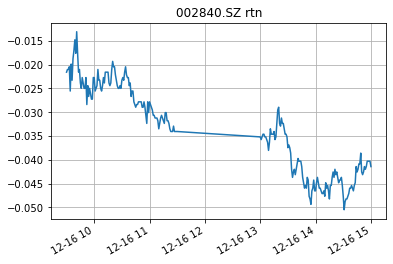

In [367]:
import matplotlib.pyplot as plt

signal_plot_begin_time = present_date[:4]+'-' + \
                         present_date[4:6]+'-' + \
                         present_date[6:8]+' 09:30:00'
df_signal['diff'].loc[signal_plot_begin_time:].plot(title=cbond_pair[0]+'@'+cbond_pair[1]+' diff',grid=True)

#如果当日有开平仓记录，在图上画出开平仓时刻的标注
if len(df_trade) == 3:
    open_tick = df_trade.index.to_list()[1]
    open_diff = df_trade['diff'].to_list()[1]
    close_tick = df_trade.index.to_list()[2]
    close_diff =  df_trade['diff'].to_list()[2]
    plt.text(open_tick,open_diff,'open')
    plt.text(close_tick,close_diff,'close')
    plt.scatter([open_tick],[open_diff],color='r')

    tmp_nv = df_trade['net value'].to_list()[2]
    if tmp_nv > 0: 
        close_color = 'g' #当天赚钱的话，平仓点位标记为绿色
    else:
        close_color = 'orange' #当天亏钱的话，平仓点位标记为橙色
    plt.scatter([close_tick],[close_diff],color=close_color)
fig_file_name = './daily_track/'+ present_date+'/'+'diff/' + cbond_pair[0] + '@' + cbond_pair[1] + '.png'
plt.savefig(fig_file_name)

plt.show()
df_signal['bond_rtn'].loc[signal_plot_begin_time:].plot(title=cbond_pair[0]+' rtn',grid=True)
plt.show()
df_signal['stock_rtn'].loc[signal_plot_begin_time:].plot(title=cbond_pair[1]+' rtn',grid=True)
plt.show()

<AxesSubplot:title={'center':'128106.SZ@002840.SZ premium rate'}>

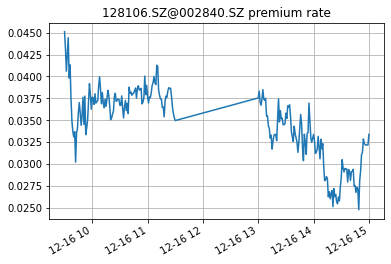

In [368]:
df_tmp = 100/convert_price*df_signal['stock_price']
df_signal['premium rate'] = (df_signal['bond_price'] - df_tmp)/df_tmp
df_signal['premium rate'].loc[signal_plot_begin_time:].plot(title=cbond_pair[0]+'@'+cbond_pair[1]+' premium rate',grid=True)


In [369]:
# cbond_volume[cbond_pair]

In [370]:
print(len(df_signal))
df_signal

243


,bond_price,stock_price,bond_rtn,stock_rtn,diff,bond_pos,stock_pos,premium rate
2022-12-15 15:00:00,205.001,17.62,0.000000,0.000000,0.000000,0.0,0.0,0.029659
2022-12-16 09:30:00,203.593,17.24,-0.006868,-0.021566,0.014698,-1.0,1.0,0.045126
2022-12-16 09:31:00,203.329,17.25,-0.008156,-0.020999,0.012843,-1.0,1.0,0.043166
2022-12-16 09:32:00,202.829,17.25,-0.010595,-0.020999,0.010404,-1.0,1.0,0.040601
2022-12-16 09:33:00,203.325,17.26,-0.008176,-0.020431,0.012256,-1.0,1.0,0.042541
...,...,...,...,...,...,...,...,...
2022-12-16 14:56:00,197.220,16.91,-0.037956,-0.040295,0.002339,0.0,0.0,0.032169
2022-12-16 14:57:00,197.220,16.91,-0.037956,-0.040295,0.002339,0.0,0.0,0.032169
2022-12-16 14:58:00,197.220,16.91,-0.037956,-0.040295,0.002339,0.0,0.0,0.032169
2022-12-16 14:59:00,197.220,16.91,-0.037956,-0.040295,0.002339,0.0,0.0,0.032169


In [371]:
# 到期时间很短，且价内50%的时候，转债近似等价于正股
def cal_premium_rate(bond_price,stock_price,convert_price):
    tmp = 100/convert_price*stock_price
    res = (bond_price - tmp)/tmp
    return res
cal_premium_rate(200,140,70)

0.0